#Setup
*   Install Packages
*   Import Packages
*   Download Data
*   Load Data



In [ ]:
!pip install requests zstandard tqdm bertopic umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 56.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB

In [ ]:
import pandas as pd

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.cluster import KMeans

In [ ]:
# reddit-islam/raw.csv
!gdown 1-45_Gtewwo04ATrgzQ-wjn4SUOv6GLXV -O islamic-raw.csv

# reddit-nonislamic/raw.csv
!gdown 1-BWiAuXUBiJ0i92DcOaf-YUwqCgU51yr -O nonislamic-raw.csv

Downloading...
From: https://drive.google.com/uc?id=1-45_Gtewwo04ATrgzQ-wjn4SUOv6GLXV
To: /content/islamic-raw.csv
100% 62.4M/62.4M [00:00<00:00, 141MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-BWiAuXUBiJ0i92DcOaf-YUwqCgU51yr
To: /content/nonislamic-raw.csv
100% 59.7M/59.7M [00:01<00:00, 40.8MB/s]


In [ ]:
#Load Data in df
islamic_df=pd.read_csv("islamic-raw.csv")
nonislamic_df=pd.read_csv("nonislamic-raw.csv")

# Fix data format
# nonislamic_df.drop('Unnamed: 0', axis=1).rename(columns={"0": "document"}).to_csv("Reddit-Non-Islamic-raw.csv" ,index=False)
# islamic_df.drop('Unnamed: 0', axis=1).to_csv("Reddit-Islam-raw.csv" ,index=False)

#Train Bert and Save Model [Don't Run]

In [ ]:
##Train Model
# ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
# vectorizer_model = CountVectorizer(stop_words="english")
# nr_topics = 34
# cluster_model = KMeans(n_clusters=nr_topics)

# topic_model = BERTopic(
#     verbose=True,
#     hdbscan_model=cluster_model,
#     calculate_probabilities=True
# )

# topics, probs = topic_model.fit_transform(df['document'])

## Save Model
# embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
# topic_model.save("model_dir", serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)
# !zip -r berttopic_model.zip model_dir

In [ ]:
# islamic_probs = topic_model.approximate_distribution(islamic_df['document'])[0]
# non_islamic_probs = topic_model.approximate_distribution(nonislamic_df['document'])[0]

# umap_model = umap.UMAP(n_components=2, random_state=42)
# reduced_islamic_vectors = umap_model.fit_transform(islamic_probs)
# reduced_non_islamic_vectors = umap_model.fit_transform(non_islamic_probs)

# plt.figure(figsize=(12, 6))

# # Scatter plot for Islamic documents (in red)
# plt.scatter(reduced_islamic_vectors[:, 0], reduced_islamic_vectors[:, 1], color='red', label='Islamic Docs', s=10, alpha=0.5)

# # Scatter plot for non-Islamic documents (in blue)
# plt.scatter(reduced_non_islamic_vectors[:, 0], reduced_non_islamic_vectors[:, 1], color='blue', label='Non-Islamic Docs', s=10, alpha=0.5)

# plt.title('2D UMAP Visualization of Islamic and Non-Islamic Document Vectors')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()

#Load the saved BERTTopic Model

In [ ]:
#Below link downloads Kmeans 34Topics model Folder
!gdown https://drive.google.com/drive/folders/1z7g7N1InDILYA1j3kwt_vfddzm498X0o -O /content/bertopic-model --folder
loaded_model = BERTopic.load("bertopic-model")

Retrieving folder list
Processing file 1-3osigDsJTyvkLQjAbeJWx6U8oxIPQAg config.json
Processing file 1-F3hypMdMydeSN7fBufN_nxyVcDAlwEz ctfidf_config.json
Processing file 1-0ux_yJBO7qZL63INFzO20xImMaraCtZ ctfidf.safetensors
Processing file 1-AypTIczXh3hOycPV82UsQT-bL5oLrLQ topic_embeddings.safetensors
Processing file 1-6PFerJQqhE1qhR24162vLTLw4lKd4xr topics.json
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1-3osigDsJTyvkLQjAbeJWx6U8oxIPQAg
To: /content/bertopic-model/config.json
100% 296/296 [00:00<00:00, 976kB/s]
Downloading...
From: https://drive.google.com/uc?id=1-F3hypMdMydeSN7fBufN_nxyVcDAlwEz
To: /content/bertopic-model/ctfidf_config.json
100% 3.91M/3.91M [00:00<00:00, 171MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0ux_yJBO7qZL63INFzO20xImMaraCtZ
To: /content/bertopic-model/ctfidf.safetensors
100% 6.26M/6.26M [00:00<00:00, 49.4MB/s]
Downloading...
From: https

In [ ]:
islamic_probs = loaded_model.approximate_distribution(islamic_df['document'])[0]
nonislamic_probs = loaded_model.approximate_distribution(nonislamic_df['document'])[0]

100%|██████████| 45/45 [01:57<00:00,  2.62s/it]


#Data Prep

In [ ]:
#shows (no. of docs x no. of topics)
print(nonislamic_probs.shape, islamic_probs.shape)

(44267, 34) (39998, 34)


In [ ]:
#The no. of features depends on no. of topics
topic_columns = [f"topic{i+1}" for i in range(islamic_probs.shape[1])]
topic_columns

['topic1',
 'topic2',
 'topic3',
 'topic4',
 'topic5',
 'topic6',
 'topic7',
 'topic8',
 'topic9',
 'topic10',
 'topic11',
 'topic12',
 'topic13',
 'topic14',
 'topic15',
 'topic16',
 'topic17',
 'topic18',
 'topic19',
 'topic20',
 'topic21',
 'topic22',
 'topic23',
 'topic24',
 'topic25',
 'topic26',
 'topic27',
 'topic28',
 'topic29',
 'topic30',
 'topic31',
 'topic32',
 'topic33',
 'topic34']

In [ ]:
islamic_df[topic_columns] = pd.DataFrame(islamic_probs, columns=topic_columns)
islamic_df["class"] = 1
islamic_df

,document,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,...,topic26,topic27,topic28,topic29,topic30,topic31,topic32,topic33,topic34,class
0,This is for people who are curious about how w...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.307835,0.0,0.0,0.0,0.000000,0.070166,1
1,#Myths about the proportion of Islamic Terrori...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
2,5. The concept of slavery:\nNow for the topic ...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.088433,0.0,0.0,0.0,0.009122,0.000000,1
3,\nMuslims in East Turkestan: Internal Persecut...,0.0,0.0,0.0,0.074757,0.0,0.0,0.286907,0.0,0.0,...,0.0,0.0,0.407223,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
4,Man is in a never ending search for the cause ...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.107826,0.0,0.0,0.0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39993,"Salaam, I am trying to figure out if anyone ha...",0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
39994,"You woke up today, opened your eyes, were able...",0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
39995,Hey everyone - today I found a torn piece of p...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
39996,"Hi there, I'm looking for a little grammar hel...",0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1


In [ ]:
nonislamic_df[topic_columns] = pd.DataFrame(nonislamic_probs, columns=topic_columns)
nonislamic_df["class"] = 0
nonislamic_df

,document,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,...,topic26,topic27,topic28,topic29,topic30,topic31,topic32,topic33,topic34,class
0,Does anyone know a way to reduce lag when play...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,"I have friends from all over the world, and it...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,I'll be 30 years old when I go back to school ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,"I am using a netbook, I picked it up to move i...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,"I live in a town called Peace, girls were foun...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44262,It seemed like a couple of years ago manufactu...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
44263,Hello all.\n\nMe and my wife want to take a we...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
44264,So I do some work for imachickenrancher.com - ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
44265,It has been an eventful half-season for Power ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df=pd.concat([islamic_df, nonislamic_df], axis=0)
df

,document,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,...,topic26,topic27,topic28,topic29,topic30,topic31,topic32,topic33,topic34,class
0,This is for people who are curious about how w...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.307835,0.0,0.0,0.0,0.000000,0.070166,1
1,#Myths about the proportion of Islamic Terrori...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
2,5. The concept of slavery:\nNow for the topic ...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.088433,0.0,0.0,0.0,0.009122,0.000000,1
3,\nMuslims in East Turkestan: Internal Persecut...,0.0,0.0,0.0,0.074757,0.0,0.0,0.286907,0.0,0.0,...,0.0,0.0,0.407223,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
4,Man is in a never ending search for the cause ...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.107826,0.0,0.0,0.0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44262,It seemed like a couple of years ago manufactu...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0
44263,Hello all.\n\nMe and my wife want to take a we...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0
44264,So I do some work for imachickenrancher.com - ...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0
44265,It has been an eventful half-season for Power ...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0


In [ ]:
#Convert the concatenated df to pkl/csv, then zip, then save for later use

df.to_pickle("islamic_nonislamic_concat.pkl")
df.to_csv("islamic_nonislamic_concat.csv", index=False)
!zip islamic_nonislamic_labelled_df_pkl-KMEANS-34topics-nostopwords.zip islamic_nonislamic_concat.pkl

  adding: islamic_nonislamic_concat.pkl (deflated 67%)


In [ ]:
## Copy zipped pkl directly to gdrive

from google.colab import drive
drive.mount('/gdrive')
!cp islamic_nonislamic_labelled_df_pkl-KMEANS-34topics-nostopwords.zip "/gdrive/MyDrive/FYP/Data/Intermediate Data for Classification"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#Download data to colab and load it into df

df = pd.read_pickle("islamic_nonislamic_final.pkl")

#Classification

## Random Forest

In [ ]:
## GRID SEARCH Version

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and class
X = df[topic_columns]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of parameter grids, each representing a set of hyperparameters
# Define an extensive hyperparameter grid for Random Forests
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with cross-validation and parallel processing
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters (Directly from Grid Search):")
print(best_params)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Results for Parameter Grid 1:
Best Hyperparameters: {'bootstrap': False, 'class_weight': None, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} 
Accuracy: 0.8229751972302628 
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      9636
           1       0.83      0.77      0.80      7983

    accuracy                           0.82     17619
   macro avg       0.82      0.82      0.82     17619
weighted avg       0.82      0.82      0.82     17619





In [ ]:
## RANDOMIZED SEARCH Version

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Separate features and class
X = df[topic_columns]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),  # Randomly sample from 50 to 200
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object with cross-validation and parallel processing
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform randomized search
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_

# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters (Randomized Search):")
print(best_params)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

## XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint


#Load the pickled df
df = pd.read_pickle("islamic_nonislamic_concat.pkl")

#The no. of features depends on no. of topics
topic_columns = df.columns[1:-1]

# Separate features and class
X = df[topic_columns]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),  # Randomly sample from 50 to 200
    'max_depth': randint(1, 10),  # Randomly sample from 1 to 10
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # List of learning rates
    'subsample': [0.5, 0.7, 0.9, 1.0],  # List of subsample values
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],  # List of colsample_bytree values
    'gamma': [0, 1, 2, 3]  # List of gamma values
}

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform randomized search
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = random_search.best_params_

# Train the XGBoost classifier with the best hyperparameters
best_xgb_classifier = XGBClassifier(random_state=42, **best_params)
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters (Randomized Search):")
print(best_params)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

## Logistic Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features and class
X = df[topic_columns]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define separate hyperparameter grids for different solver types
param_grid_newton_cg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['newton-cg'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
}

param_grid_lbfgs = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
}

param_grid_saga = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
}

param_grid_liblinear = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
}

# Combine the separate grids into a single list for grid search
param_grids = [param_grid_newton_cg, param_grid_lbfgs, param_grid_saga, param_grid_liblinear]

# Perform grid search for each solver-specific hyperparameter grid
best_models = []
for i, param_grid in enumerate(param_grids):
    # Initialize the Logistic Regression classifier
    lr_classifier = LogisticRegression()

    # Create a GridSearchCV object with cross-validation for the current solver grid
    grid_search = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

    # Perform grid search
    grid_search.fit(X_train, y_train)

    # Store the best model for later evaluation
    best_models.append(grid_search)

    # Print the best hyperparameters for the current solver
    print(f"Best Hyperparameters for Solver {i + 1}:")
    print(grid_search.best_params_)

Best Hyperparameters for Solver 1:
{'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Hyperparameters for Solver 2:
{'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Hyperparameters for Solver 3:
{'C': 100, 'class_weight': None, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Best Hyperparameters for Solver 4:
{'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Evaluate the best models on the test set
for i, best_model in enumerate(best_models):
    y_pred = best_model.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"\nEvaluation for Solver {i + 1}:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)


Evaluation for Solver 1:
Accuracy: 0.7487939156592315
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78      9636
           1       0.75      0.66      0.70      7983

    accuracy                           0.75     17619
   macro avg       0.75      0.74      0.74     17619
weighted avg       0.75      0.75      0.75     17619


Evaluation for Solver 2:
Accuracy: 0.7485101311084624
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78      9636
           1       0.75      0.66      0.70      7983

    accuracy                           0.75     17619
   macro avg       0.75      0.74      0.74     17619
weighted avg       0.75      0.75      0.75     17619


Evaluation for Solver 3:
Accuracy: 0.7487939156592315
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78      9636


## SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform

# Load the pickled df
df = pd.read_pickle("islamic_nonislamic_concat.pkl")

# The no. of features depends on the number of topics
topic_columns = df.columns[1:-1]

# Separate features and class
X = df[topic_columns]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'C': uniform(0.01, 100),  # Randomly sample from a uniform distribution between 0.01 and 100 for C
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # List of kernel types
    'degree': [2, 3, 4],  # List of polynomial degrees
    'coef0': uniform(0.0, 1.0),  # Randomly sample from a uniform distribution between 0.0 and 1.0 for coef0
    'gamma': ['scale', 'auto'] + list(uniform(0.1, 2, 5)),  # List of gamma values
    'shrinking': [True, False],  # List of shrinking values
    'decision_function_shape': ['ovo', 'ovr']  # List of decision function shapes
}

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform randomized search
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = random_search.best_params_

# Train the SVM classifier with the best hyperparameters
best_svm_classifier = SVC(random_state=42, **best_params)
best_svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters (Randomized Search):")
print(best_params)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

## Dimensionality Reduction

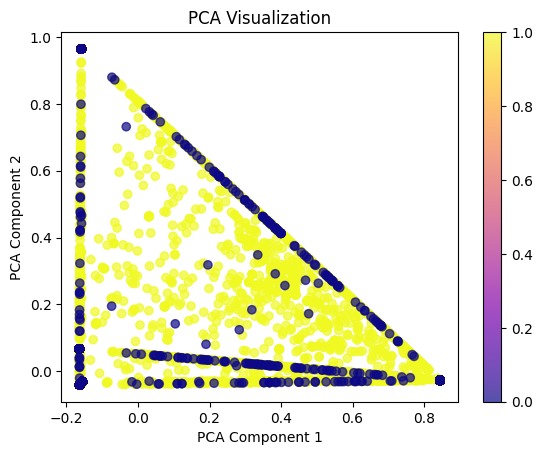

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming your data is in a DataFrame called df
X = df.iloc[:, 1:-1]  # Extract the vectors
y = df.iloc[:, -1]   # Extract the class labels

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')
plt.colorbar()
plt.show()

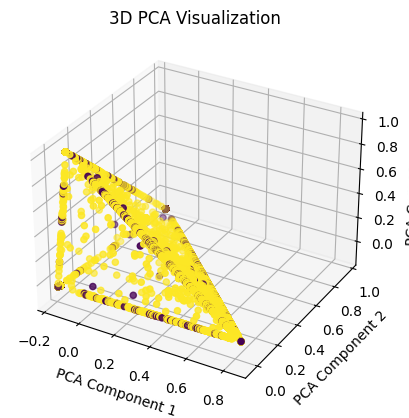

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming your data is in a DataFrame called df
X = df.iloc[:, 1:-1]  # Extract the vectors
y = df.iloc[:, -1]   # Extract the class labels

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D PCA Visualization')
plt.show()

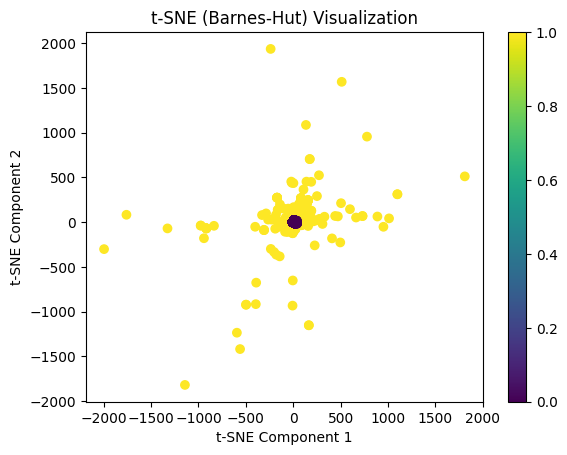

In [ ]:
###MEMORY REDUCED TSNE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming your data is in a DataFrame called df
X = df.iloc[:, 1:-1]  # Extract the vectors
y = df.iloc[:, -1]   # Extract the class labels

# Apply Barnes-Hut t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, n_iter=250, method='barnes_hut', verbose=2)
X_tsne = tsne.fit_transform(X)

# Create a scatter plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE (Barnes-Hut) Visualization')
plt.colorbar()
plt.show()

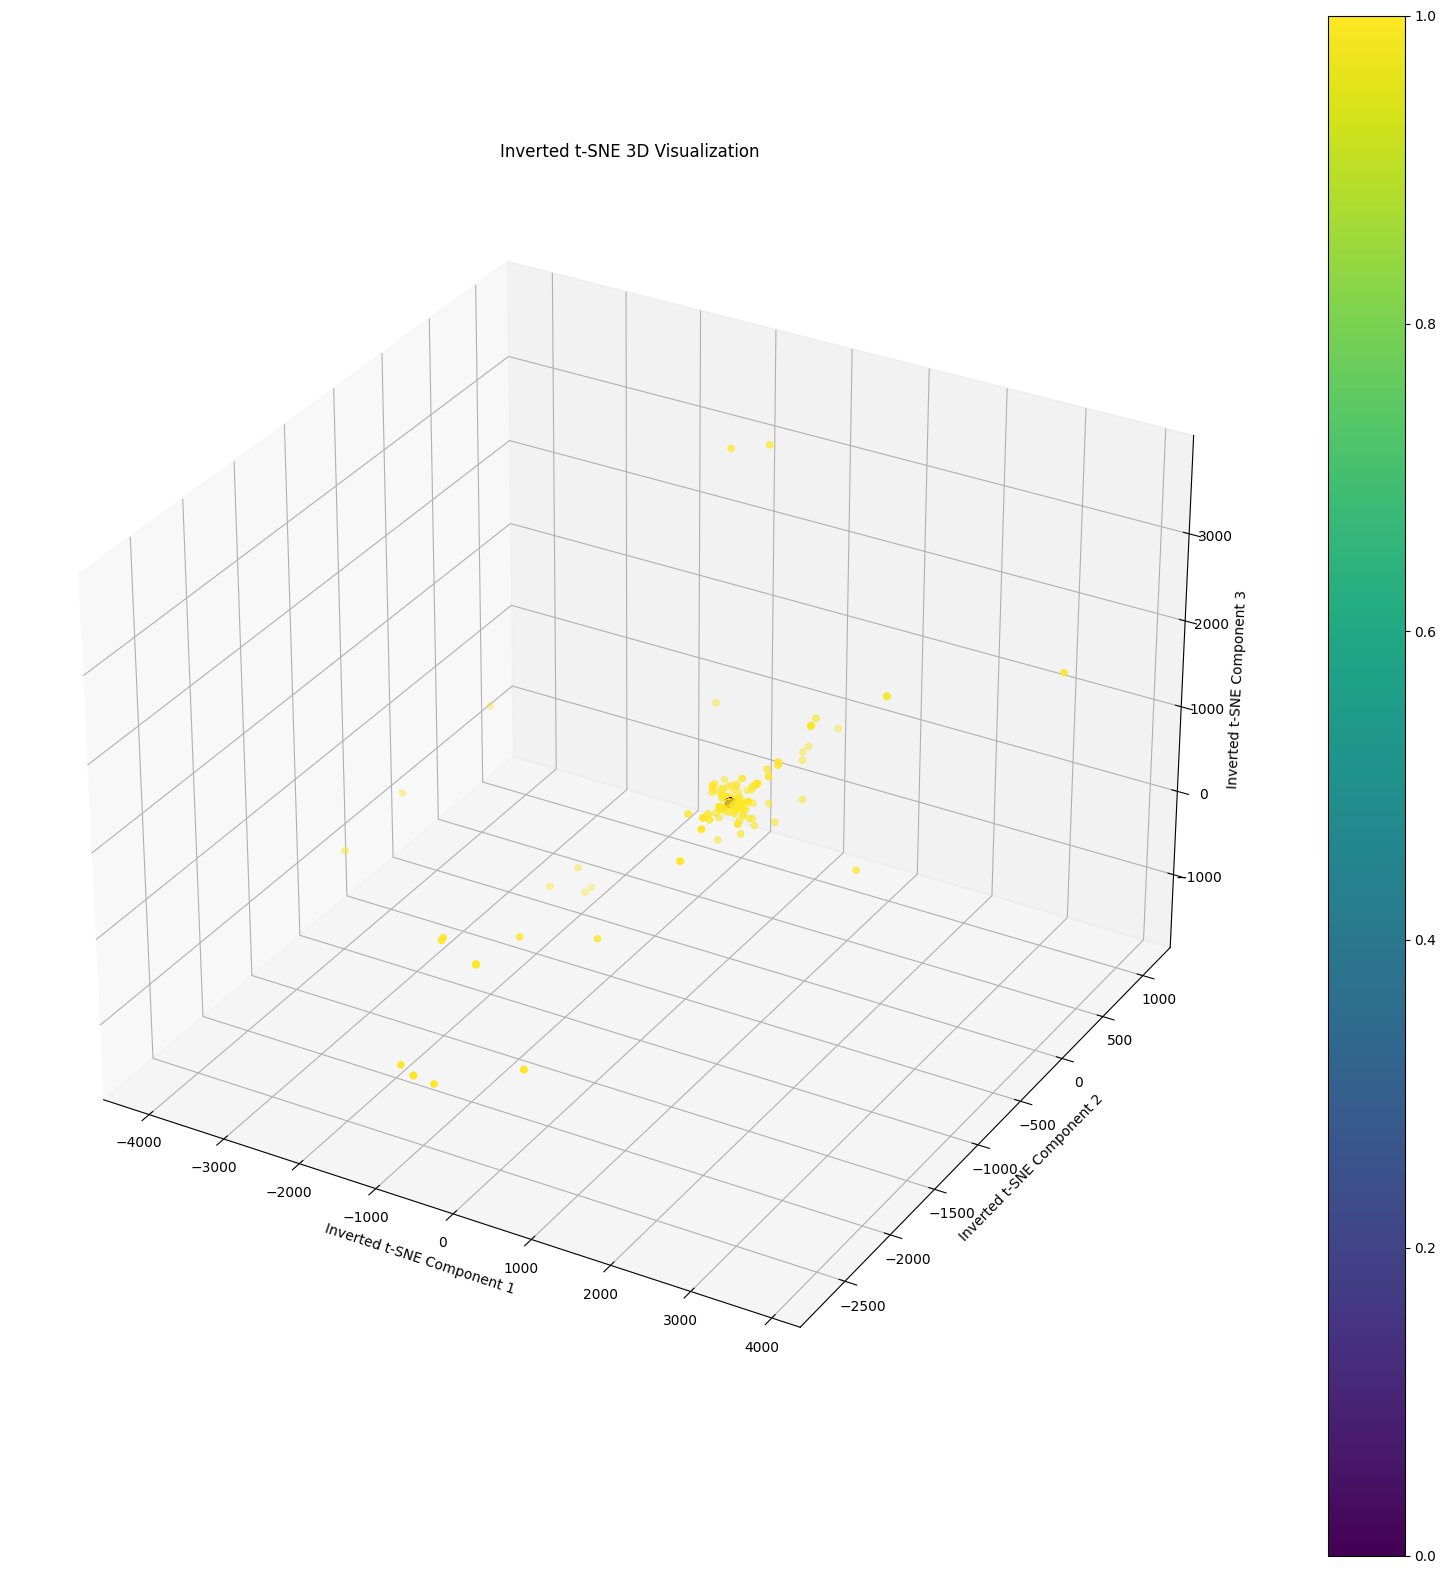

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
from sklearn.manifold import TSNE

# Assuming your data is in a DataFrame called df
X = df.iloc[:, 1:-1]  # Extract the vectors
y = df.iloc[:, -1]   # Extract the class labels

# Apply Barnes-Hut t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42, n_iter=250, method='barnes_hut', verbose=2)
X_tsne3d = tsne.fit_transform(X)

# Invert the axes in the 3D scatter plot
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Invert the axes by multiplying with -1
X_tsne3d_inverted = X_tsne3d * (-1)

# Scatter plot with color mapping and inverted axes
sc = ax.scatter(X_tsne3d_inverted[:, 0], X_tsne3d_inverted[:, 1], X_tsne3d_inverted[:, 2], c=y, cmap='viridis')
plt.xlabel('Inverted t-SNE Component 1')
plt.ylabel('Inverted t-SNE Component 2')
ax.set_zlabel('Inverted t-SNE Component 3')
plt.title('Inverted t-SNE 3D Visualization')
fig.colorbar(sc)

plt.show()

# Using a Random Sample on Kmeans 34 topics no stopwords

In [ ]:
## Copy File out from gdrive

from google.colab import drive
drive.mount('/gdrive')
!cp "/gdrive/MyDrive/FYP/Data/Intermediate Data for Classification/islamic_nonislamic_labelled_df_pkl-KMEANS-34topics-nostopwords.zip" .
!unzip islamic_nonislamic_labelled_df_pkl-KMEANS-34topics-nostopwords.zip

Mounted at /gdrive
Archive:  islamic_nonislamic_labelled_df_pkl-KMEANS-34topics-nostopwords.zip
  inflating: islamic_nonislamic_concat.pkl  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp

# Load the df
df=pd.read_pickle("islamic_nonislamic_concat.pkl")

# Separate features and class
X = df.iloc[:,1:-1]
y = df['class']

# Specify the desired sample size (e.g., 10,000 samples)
sample_size = 10000

# Perform stratified random sampling
X_sampled, _, y_sampled, _ = train_test_split(X, y, test_size=(1 - (sample_size / len(X))), stratify=y, random_state=42)

# Create a DataFrame from the sampled data
sampled_df = pd.concat([X_sampled, y_sampled], axis=1).reset_index(drop=True)

# Perform a Kolmogorov-Smirnov test to validate representativeness
statistic, p_value = ks_2samp(X.values.flatten(), X_sampled.values.flatten())

# Check if the p-value is significant (common significance level is 0.05)
if p_value < 0.05:
    print("The two datasets have significantly different distributions.")
else:
    print("The two datasets have similar distributions.")

# Display the sampled DataFrame
print("Sampled DataFrame:")
sampled_df

The two datasets have similar distributions.
Sampled DataFrame:


,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,...,topic26,topic27,topic28,topic29,topic30,topic31,topic32,topic33,topic34,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Load the df
df = sampled_df

# The no. of features depends on the number of topics
topic_columns = df.columns[1:-1]

# Separate features and class
X = df[topic_columns]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),  # Randomly sample from 50 to 200
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object with cross-validation and parallel processing
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=5)

# Perform randomized search
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_

# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters (Randomized Search):")
print(best_params)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters (Randomized Search):
{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 137}

Model Evaluation:
Accuracy: 0.6235
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.88      0.71      1042
           1       0.72      0.35      0.47       958

    accuracy                           0.62      2000
   macro avg       0.66      0.61      0.59      2000
weighted avg       0.66      0.62      0.59      2000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the df
df=pd.read_pickle("islamic_nonislamic_concat.pkl")

# The no. of features depends on the number of topics
topic_columns = df.columns[1:-1]

# Separate features and class
X = df[topic_columns]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'bootstrap': False,
    'class_weight': None,
    'max_depth': None,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 100
}

# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **params)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters (Directly from Grid Search):")
print(params)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters (Directly from Grid Search):
{'bootstrap': False, 'class_weight': None, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Model Evaluation:
Accuracy: 0.6366225597816413
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.90      0.72      8886
           1       0.76      0.34      0.47      7967

    accuracy                           0.64     16853
   macro avg       0.68      0.62      0.60     16853
weighted avg       0.68      0.64      0.60     16853



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the df
df=pd.read_pickle("islamic_nonislamic_concat.pkl")

# The no. of features depends on the number of topics
topic_columns = df.columns[1:-1]

# Separate features and class
X = df[topic_columns]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'C': 100,
    'class_weight': None,
    'max_iter': 100,
    'penalty': 'l2',
    'solver': 'liblinear'
}

# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = LogisticRegression(random_state=42, **params)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters (Directly from Grid Search):")
print(params)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Best Hyperparameters (Directly from Grid Search):
{'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Model Evaluation:
Accuracy: 0.6357325105322494
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.88      0.72      8886
           1       0.73      0.36      0.48      7967

    accuracy                           0.64     16853
   macro avg       0.67      0.62      0.60     16853
weighted avg       0.67      0.64      0.61     16853



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Load the df
df=pd.read_pickle("islamic_nonislamic_concat.pkl")

# The no. of features depends on the number of topics
topic_columns = df.columns[1:-1]

# Separate features and class
X = df[topic_columns]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

################################################################
# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),  # Randomly sample from 50 to 200
    'max_depth': randint(1, 10),  # Randomly sample from 1 to 10
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # List of learning rates
    'subsample': [0.5, 0.7, 0.9, 1.0],  # List of subsample values
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],  # List of colsample_bytree values
    'gamma': [0, 1, 2, 3]  # List of gamma values
}

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist,
                                   n_iter=100, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=10)

# Perform randomized search
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = random_search.best_params_

# Train the XGBoost classifier with the best hyperparameters
best_xgb_classifier = XGBClassifier(random_state=42, **best_params)
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters (Randomized Search):")
print(best_params)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
################################################################


# params = {
#     'colsample_bytree': 0.7,  # List of colsample_bytree values
#     'gamma': 0,  # List of gamma values
#     'learning_rate': 0.2,  # List of learning rates
#     'max_depth': 8,  # Randomly sample from 1 to 10
#     'n_estimators': 177,  # Randomly sample from 50 to 200
#     'subsample': 1.0  # List of subsample values
# }

# # Train the XGBoost classifier with the best hyperparameters
# best_xgb_classifier = XGBClassifier(random_state=42, **params)
# best_xgb_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_xgb_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print("Best Hyperparameters (Randomized Search):")
# print(params)

# print("\nModel Evaluation:")
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_rep)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters (Randomized Search):
{'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 139, 'subsample': 0.5}

Model Evaluation:
Accuracy: 0.6378686287307898
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.90      0.72      8886
           1       0.76      0.34      0.47      7967

    accuracy                           0.64     16853
   macro avg       0.68      0.62      0.60     16853
weighted avg       0.68      0.64      0.61     16853



#LDA Classification

In [ ]:
#Install Package
!pip install gensim

#Mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Packages
import pandas as pd
import pickle
from gensim.test.utils import datapath
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.matutils import corpus2csc
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Load Models and Dictionary

In [ ]:
#Load Trained LDA Model for Inference
folder_name = "lda-combinedv2-80topics-standardfilter-10pass-20iters-0.56cv"
model_path = datapath(f"/content/drive/MyDrive/FYP/Models/{folder_name}/model")
ldamodel=LdaModel.load(model_path)

#Load Premade Dictionary that LDA requires for inference
#Dictionary maps each unique token to an ID
dictionary_path = datapath(f"/content/drive/MyDrive/FYP/Models/{folder_name}/model.id2word")
dictionary = Dictionary.load(dictionary_path)

# #Load Trained Random Forest Classifier
# loaded_classifier = pickle.load(open("/content/drive/MyDrive/FYP/Models/lda-combined-50topics-standardfilter-10pass-20iters-0.58cv/lda-RF-randomsearch", "rb"))

## Preprocess Corpus and LDA Inference

In [ ]:
clean_corpus = pd.read_csv("/content/drive/MyDrive/FYP/Data/train-test-data/test-clean-customstopwords.csv")
clean_corpus

,document,class
0,talk elderly italian woman dish mother cook po...,0
1,week chocolate cake mug immediately intrigue p...,0
2,package spaghetti noodle angel hair ground bee...,0
3,friend weekend bit cooking frustrated disorgan...,0
4,serve prep time minute vegetable mandolin cook...,0
...,...,...
109500,abu hurairah report messenger peace offer pray...,1
109501,mother celebrate pagan holiday solstice yule c...,1
109502,asak limit option parent basically stop care b...,1
109503,read quran figure question maybe million quest...,1


In [ ]:
#Tokenise the data and preprocess it using gensim's function
#Output: pd.series where each row(doc) contains a list of strings(tokens)
tokenized_corpus = clean_corpus['document'].apply(lambda x: simple_preprocess(x))

#Use the premade dictionary to create a bag of words representation for each doc
#Output: list of lists(doc) of tuples(token_id, frequency)
bow_corpus = [dictionary.doc2bow(tokenized_doc) for tokenized_doc in tokenized_corpus]

#Run LDA inference on the whole corpus to get the prob. distr. over the topics for each doc
#Output: A special sparse matrix format used by Gensim
probs_corpus = ldamodel[bow_corpus]

#Convert the sparse matrix format to a numpy.ndarray
#Output: 2d array of docs x topics
probs_corpus = corpus2csc(probs_corpus).T.toarray()

In [ ]:
# Determine the number of topics (number of columns in probs_corpus)
num_topics = probs_corpus.shape[1]

# Create column names according to the number of topics
topic_columns = [f"topic {i+1}" for i in range(num_topics)]

# Make a new DataFrame for classification
df_classification = pd.DataFrame(probs_corpus, columns=topic_columns)
df_classification['class'] = clean_corpus['class']
df_classification

,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,...,topic 72,topic 73,topic 74,topic 75,topic 76,topic 77,topic 78,topic 79,topic 80,class
0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.071413,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.167531,0.0,0.000000,0.000000,...,0.000000,0.000000,0.030974,0.0,0.000000,0.000000,0.025079,0.000000,0.000000,0
2,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.085436,0.0,0.000000,0.026496,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.455474,0.0,0.000000,0.013290,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.040027,0
4,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.059706,0.0,0.016570,0.000000,...,0.081197,0.000000,0.000000,0.0,0.000000,0.080994,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89869,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.029125,0.0,0.061897,0.000000,...,0.117633,0.017059,0.000000,0.0,0.281708,0.000000,0.022765,0.000000,0.000000,1
89870,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.123929,0.0,0.015358,0.000000,...,0.012365,0.000000,0.000000,0.0,0.000000,0.016018,0.000000,0.000000,0.000000,0
89871,0.0,0.037615,0.000000,0.0,0.00000,0.0,0.160559,0.0,0.016798,0.000000,...,0.000000,0.000000,0.282020,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
89872,0.0,0.000000,0.010286,0.0,0.00000,0.0,0.030922,0.0,0.000000,0.000000,...,0.045970,0.000000,0.010234,0.0,0.000000,0.034855,0.118277,0.000000,0.000000,1


In [ ]:
X_test2 = df_test_modified[topic_columns]
y_test2 = df_test_modified['class']

# Make predictions on the test set
y_pred2 = nb_classifier.predict(X_test2)

# Evaluate the model
accuracy = accuracy_score(y_test2, y_pred2)
classification_rep = classification_report(y_test2, y_pred2)

print("Best Hyperparameters:")
print(best_params)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Best Hyperparameters:
{'priors': [0.99, 0.01]}

Model Evaluation:
Accuracy: 0.8899166666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      6000
           1       0.88      0.91      0.89      6000

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score

X = df_classification[topic_columns]
y = df_classification['class']

# Split the data into training and testing sets for initial evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

param_grid = {'priors': [None, [0.99, 0.01], [0.98, 0.02], [0.95, 0.05], [0.9, 0.1], [0.85, 0.15], [0.8, 0.2], [0.75, 0.25]]}

# Perform hyperparameter tuning using GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, scoring='accuracy', cv=5, verbose=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the classifier with the best hyperparameters and train it
nb_classifier = GaussianNB(**best_params)
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters:")
print(best_params)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START priors=None.................................................
[CV 1/5; 1/8] END ..................priors=None;, score=0.877 total time=   0.1s
[CV 2/5; 1/8] START priors=None.................................................
[CV 2/5; 1/8] END ..................priors=None;, score=0.876 total time=   0.2s
[CV 3/5; 1/8] START priors=None.................................................
[CV 3/5; 1/8] END ..................priors=None;, score=0.876 total time=   0.1s
[CV 4/5; 1/8] START priors=None.................................................
[CV 4/5; 1/8] END ..................priors=None;, score=0.878 total time=   0.1s
[CV 5/5; 1/8] START priors=None.................................................
[CV 5/5; 1/8] END ..................priors=None;, score=0.880 total time=   0.1s
[CV 1/5; 2/8] START priors=[0.99, 0.01].........................................
[CV 1/5; 2/8] END ..........priors=[0.99, 0.01];,

## Visualise Importance of Each Topic

In [ ]:
import matplotlib.pyplot as plt

imptermslist=[]
for topic,imp in zip(range(50), loaded_classifier.feature_importances_):
    imptermslist.append((imp, [f"topic:{topic}"]+[tup[0] for tup in ldamodel.show_topic(topic)]))

imptermslist = sorted(imptermslist, key=lambda x: x[0], reverse=True)

sorted_imps, sorted_words = zip(*imptermslist)

plt.figure(figsize=(14, 14))  # Adjust the figure size as needed
bars = plt.barh(range(len(sorted_imps)), sorted_imps, color='skyblue')
plt.yticks(range(len(sorted_imps)), [' '.join(words) for words in sorted_words])

for bar, value in zip(bars, sorted_imps):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.4f}', ha='left', va='center')

plt.xlabel('Importance')
plt.ylabel('Words in each topic')
plt.title('Importance of each topic in Classification')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value at the top
plt.show()

# Using Kmeans 34 Topics With Stopwords